In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statistics

In [5]:
df  = sns.load_dataset('tips')

In [7]:
# mean

np.mean(df['total_bill'])

19.785942622950824

In [9]:
# median 

np.median(df['total_bill'])

17.795

In [12]:
# mode

statistics.mode(df['total_bill'])

13.42

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

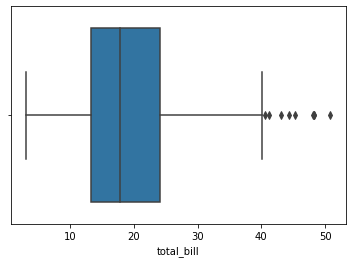

In [13]:
sns.boxplot(df['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

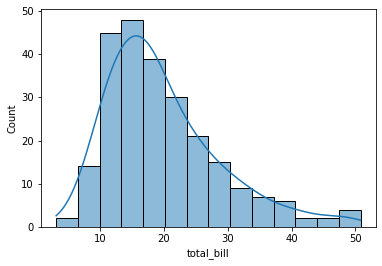

In [15]:
sns.histplot(df['total_bill'], kde = True)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

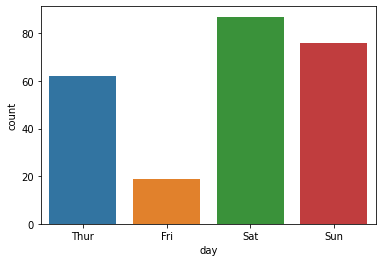

In [17]:
sns.countplot(df['day'])

<AxesSubplot:xlabel='time', ylabel='count'>

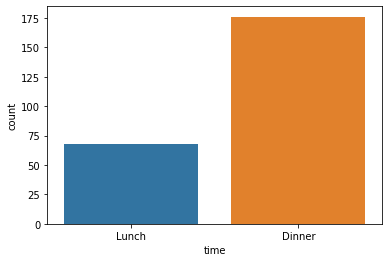

In [18]:
sns.countplot(df['time'])

In [21]:
np.percentile(df['total_bill'], [25, 75])

array([13.3475, 24.1275])

In [23]:
IQR = 24.1275 - 13.3475
IQR

10.780000000000001

In [27]:
df2 = sns.load_dataset('iris')
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [28]:
np.mean(df2['sepal_length'])

5.843333333333335

In [29]:
np.median(df2['sepal_length'])

5.8

In [31]:
statistics.mode(df2['sepal_length'])

5.0

In [32]:
## outliers
## Define dataset
dataset = [11, 10, 12, 14, 12, 15, 14 ,13, 15 ,102, 12, 14, 17, 19, 107, 10, 13, 12 ,14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 13,13, 15, 10]

<AxesSubplot:ylabel='Count'>

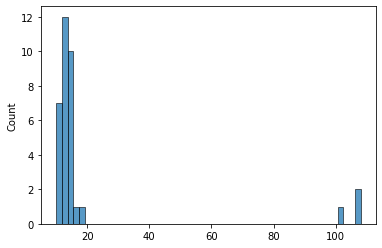

In [33]:
sns.histplot(dataset)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

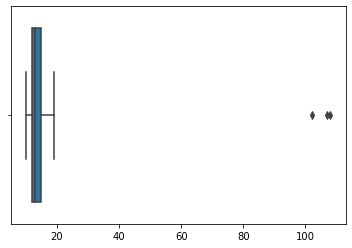

In [34]:
sns.boxplot(dataset)

In [35]:
## Z-score, IQR 

outliers = []

def detect_outliers(data):
    threshold = 3 ## 3 standard deviation
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    
    return outliers
        


In [ ]:
detect_outliers(dataset)

## Outliers using IQR
1. sort the data
2. Calculate Q1 and Q3
3. IQR(Q1-Q3)
4. Find the Lower Fence (q1-1.5(Iqr))
5. Find the Higher Fence (q3 + 1.5(Iqr))

In [44]:
### Outliers using IQR

outliers = []
def detect_outliers_IQR(data):
    data = sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr= q3 - q1
    lower_fence = q1 - 1.5 *(iqr)
    higher_fence = q3 + 1.5 *(iqr)
    for i in data:
        if i < lower_fence:
            outliers.append(i)
        if i >higher_fence:
            outliers.append(i)
    return outliers
    

In [45]:
detect_outliers_IQR(dataset)

[102, 107, 108]